In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import sklearn.preprocessing as pre
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler


In [2]:
data=pd.read_csv("insurance_claims.csv")

In [3]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
cat_df=data.select_dtypes(exclude=["float64","int64"])
num_df=data.select_dtypes(include=["float64","int64"])

In [6]:
data = data.replace('?',np.NaN)

In [7]:
# we will replace the '?' by the most common collision type as we are unaware of the type.
data['collision_type'].fillna(data['collision_type'].mode()[0], inplace = True)

In [8]:
# It may be the case that there are no responses for property damage then we might take it as No property damage.
data['property_damage'].fillna('NO', inplace = True)

In [9]:
# again, if there are no responses fpr police report available then we might take it as No report available
data['police_report_available'].fillna('NO', inplace = True)

In [10]:
data.isnull().any().any()

False

## EDA

In [11]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

In [12]:
cat_df.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

N    753
Y    247
Name: fraud_reported, dtype: int64

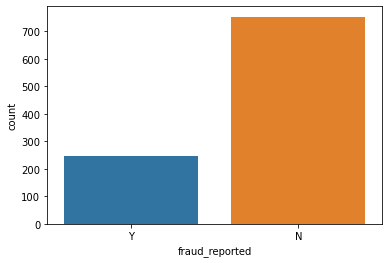

In [13]:
sns.countplot(x='fraud_reported',data=data)
plt.rcParams["figure.figsize"] = [5,5]
data['fraud_reported'].value_counts()

Here you can observe that the classes of the output variable is not proportionate

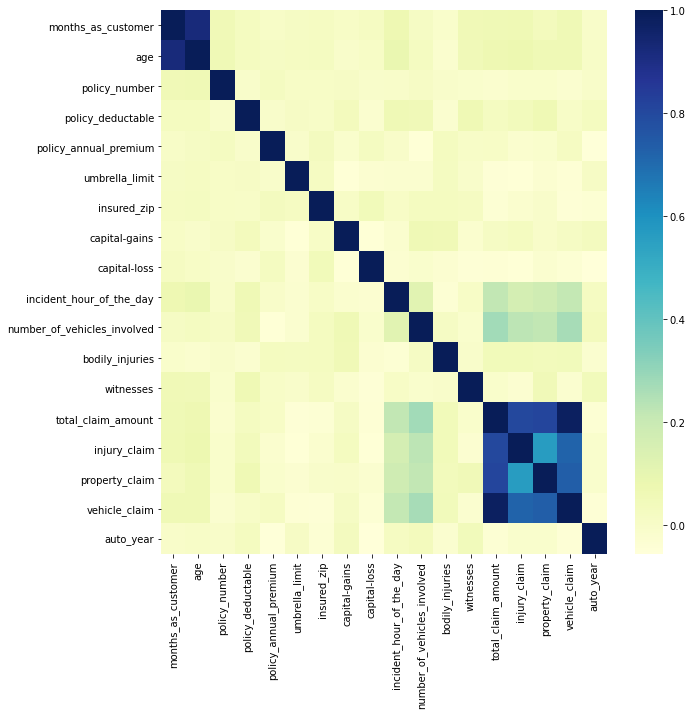

In [59]:
sns.heatmap(num_df.corr(), cmap="YlGnBu")
plt.rcParams["figure.figsize"] = [10,10]

Here you can observe that total_claim_amount, injury_claim, property_claim, vehicle_claim are high correlated to eachother
and they are slightly correlated with incident_hour_of_the_day,number_of_vehicles_involved .
Age and month_as_customers are also highly correlated for obvious reasons.

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

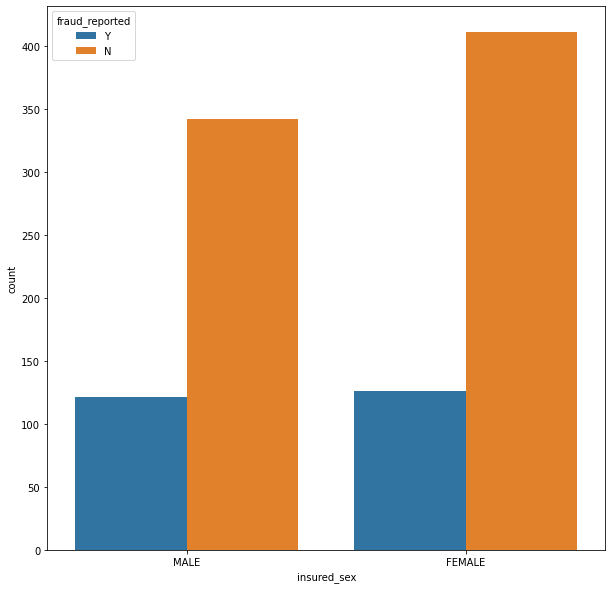

In [15]:
sns.countplot(x='insured_sex',hue="fraud_reported",data=data)
plt.rcParams["figure.figsize"] = [5,5]
data["insured_sex"].value_counts()

The dataset contains more number of females and we can observe that the count of men and women who has commited fraud is equal, 
which implies fraud is irrespective of the gender. 

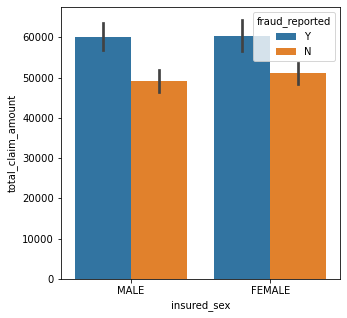

In [16]:
sns.barplot(x='insured_sex',y='total_claim_amount',hue='fraud_reported',data=data)

The average annual policy premium is same for both the classes.

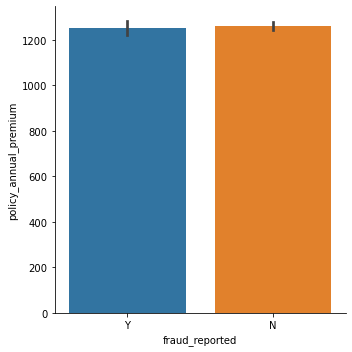

In [17]:
sns.catplot(data=data,x="fraud_reported",y='policy_annual_premium',kind="bar")

The average annual policy premium is same for both the classes. 

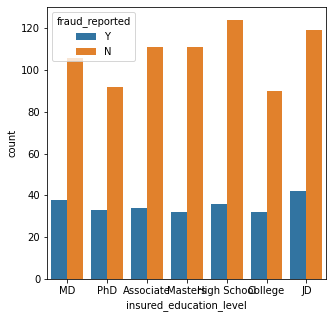

In [18]:
sns.countplot(x='insured_education_level',hue='fraud_reported',data=data)
plt.rcParams["figure.figsize"] = [8,8]

Here we can observe that JD education level commit more fraud that others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

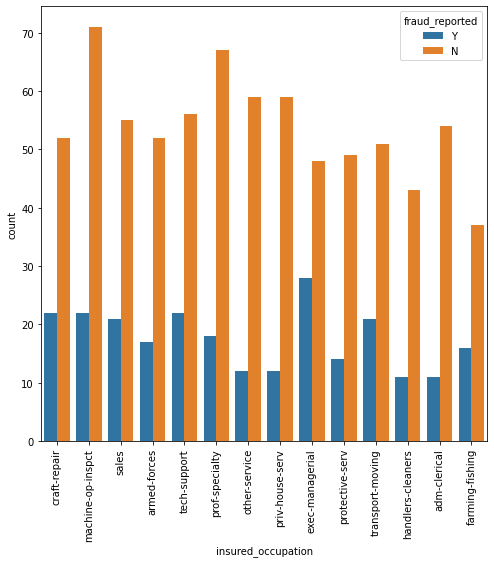

In [19]:
sns.countplot(x='insured_occupation',hue='fraud_reported',data=data)
plt.rcParams["figure.figsize"] = [10,10]
plt.xticks(rotation=90)

Here we can observe that exec-managerial education level commit more fraud that others.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

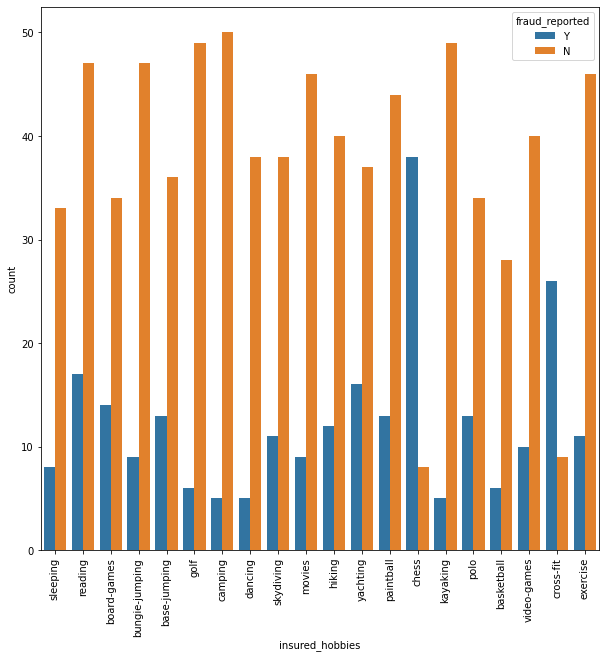

In [20]:
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=data)
plt.rcParams["figure.figsize"] = [10,10]
plt.xticks(rotation=90)


People who play more chess are claimed more fraudulent followed by crossfit

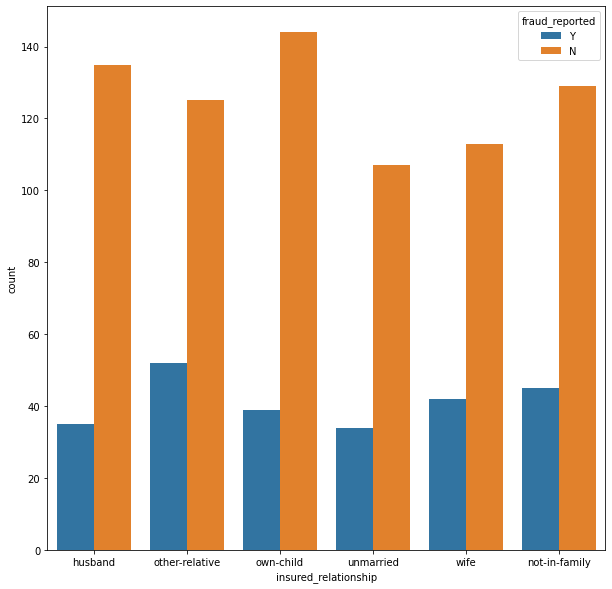

In [21]:
sns.countplot(x='insured_relationship',hue='fraud_reported',data=data)
plt.rcParams["figure.figsize"] = [10,10]

Insurance Holders having insured relationship as other-relative are more likely to commit fraud. 

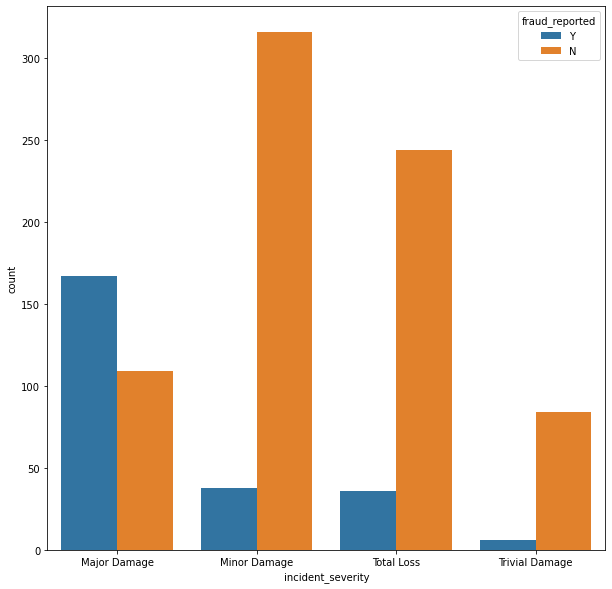

In [22]:
sns.countplot(x='incident_severity',hue='fraud_reported',data=data)
plt.rcParams["figure.figsize"] = [10,10]

Accident severity reported as major damage is more likely to commit fraud.

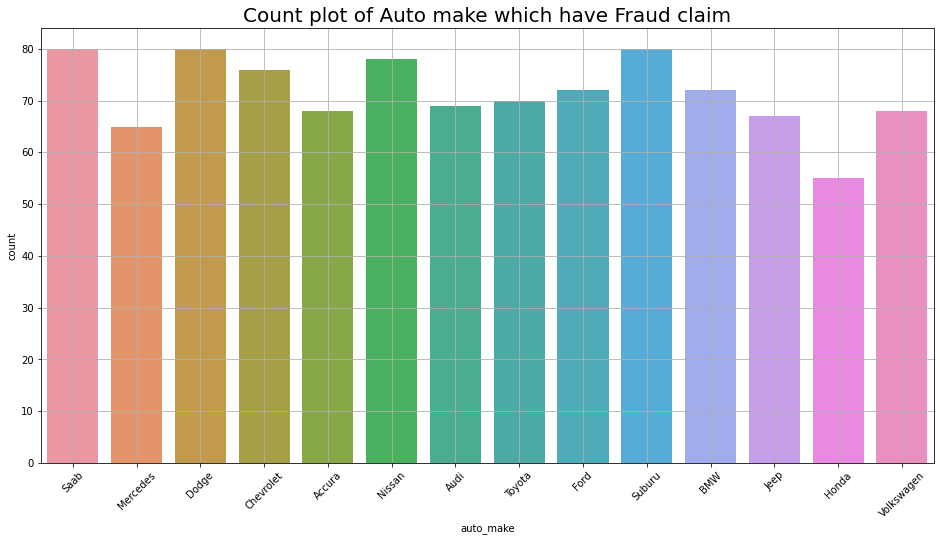

In [23]:
plt.figure(figsize=(16,8))
plt.title("Count plot of Auto make which have Fraud claim",fontsize=20)
sns.countplot('auto_make',data=data)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Auto make of 'Ford' and 'Mercedes' are having highest Fraud claim, 'Chevorlet' and 'Audi' also seems to be claimed equally having Fraud claims

## UNDERSAMPLING

Find Number of samples from each criteria

In [24]:
df=data

In [25]:
no_fraud = len(df[df['fraud_reported'] == "N"])
no_fraud

753

In [26]:
yes_fraud = len(df[df['fraud_reported'] == "Y"])
yes_fraud

247

Get indices of not fraud samples

In [27]:
no_fraud_indices = df[df.fraud_reported == "N"].index
no_fraud_indices

Int64Index([  2,   4,   6,   7,   8,   9,  10,  11,  12,  13,
            ...
            990, 991, 992, 993, 994, 995, 996, 997, 998, 999],
           dtype='int64', length=753)

Random sample indices

In [28]:
random_indices = np.random.choice(no_fraud_indices,yes_fraud)
random_indices

array([408, 385, 916, 301, 393, 951, 971, 464, 315, 934, 267, 444, 892,
       485, 562, 488,  37, 159, 675, 239, 647, 274, 976, 484, 376, 664,
       545, 285, 260,  78,  80, 723, 827, 910,  81, 655, 899, 918, 389,
       158,  87, 204, 550, 999, 362, 260, 903, 381, 485, 758, 418, 760,
       776, 199, 795, 759, 323, 800, 804, 321,  92, 181, 636, 621, 760,
       464, 285, 376,  98,  13, 221, 153, 491, 464, 746, 493, 888, 312,
       170, 852, 996,   2, 110, 180, 923, 162, 335, 806, 224, 420, 608,
       697, 933, 894, 726, 677, 157, 230, 720, 811, 226, 532, 516, 820,
       948, 472,  90, 240, 618, 569, 509, 267, 409, 748, 410, 605, 524,
       923, 725, 232, 799, 826, 536, 438, 536, 527, 192, 497, 714, 423,
       885, 134, 114, 581, 716, 685,  67, 870, 486, 323, 202, 169,  67,
       786, 800, 877, 464, 296, 968, 542, 101, 353, 205,  72, 527, 780,
       945, 229, 993, 898, 720, 735, 678, 844, 954, 137, 114, 876, 114,
       757, 754, 592, 110, 270, 301, 495, 113,  94, 191, 375, 56

Find the indices of fraud samples

In [29]:
fraud_indices = df[df.fraud_reported == "Y"].index

Concat default indices with sample fraud ones

In [30]:
under_sample_indices = np.concatenate([fraud_indices,random_indices])

In [31]:
under_sample = df.loc[under_sample_indices]

In [32]:
under_sample["fraud_reported"].value_counts()

N    247
Y    247
Name: fraud_reported, dtype: int64

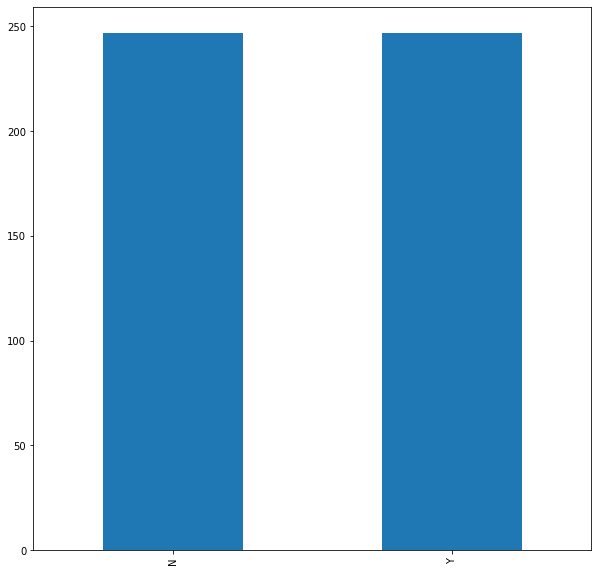

In [33]:
under_sample["fraud_reported"].value_counts().plot.bar()

In [34]:
le=pre.LabelEncoder()
for i in cat_df.columns:
    under_sample[i]=le.fit_transform(under_sample[i])

## Machine Learning Modeling

In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [38]:
x_scale=sc.fit_transform(under_sample)

In [39]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
x_scaled=pca.fit_transform(x_scale)
outcome=under_sample["fraud_reported"]

In [40]:
r=pca.explained_variance_ratio_

In [41]:
np.sum(r)

0.9540629790541922

In [42]:
len(r)

32

1039 features are converted into 944 principal components which constitutes 95.02% variance.

The explained variance tells how much information (variance) can be attributed to each of the principal components

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,outcome,test_size=0.3)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf=RandomForestClassifier()

In [46]:
#Hyperparamenter tuning
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'], 'max_depth': np.arange(1,30)}

In [47]:
grid=GridSearchCV(rf,parameters)

In [48]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [49]:
model=grid.best_estimator_

In [50]:
grid.best_score_

0.9246376811594204

In [51]:
y_pred=model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8859060402684564

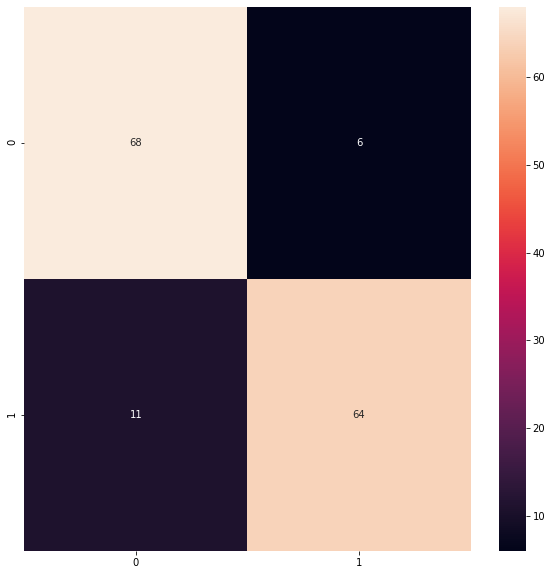

In [53]:
from sklearn.metrics import confusion_matrix,classification_report

cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [54]:
clf=classification_report(y_pred,y_test)
print(clf)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        74
           1       0.91      0.85      0.88        75

    accuracy                           0.89       149
   macro avg       0.89      0.89      0.89       149
weighted avg       0.89      0.89      0.89       149

